<a href="https://colab.research.google.com/github/jeftbiker/colabAnnalitica/blob/main/TestAnomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("imports-85.data", sep=',', names=['symboling', 'normalized-losses', 'make',
                                                                       'fuel-type', 'aspiration', 'num-of-doors',
                                                                       'body-style', 'drive-wheels', 'engine-location',
                                                                       'wheel-base', 'length', 'width', 'height',
                                                                       'curb-weight', 'engine-type', 'num-of-cylinders',
                                                                       'engine-size', 'fuel-system', 'bore', 'stroke',
                                                                       'compression-ratio', 'horsepower', 'peak-rpm',
                                                                       'city-mpg', 'highway-mpg', 'price' ])

df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [34]:
df_vol= df.loc[:, ['make', 'num-of-doors', 'body-style', 'compression-ratio']]
df_vol

,make,num-of-doors,body-style,compression-ratio
0,alfa-romero,dos,convertible,9.0
1,alfa-romero,dos,convertible,9.0
2,alfa-romero,dos,hatchback,9.0
3,audi,cuatro,sedan,10.0
4,audi,cuatro,sedan,8.0
...,...,...,...,...
200,volvo,cuatro,sedan,9.5
201,volvo,cuatro,sedan,8.7
202,volvo,cuatro,sedan,8.8
203,volvo,cuatro,sedan,23.0


In [30]:
df_vol['num-of-doors'].unique()


array(['dos', 'cuatro', '?'], dtype=object)

In [31]:
df_vol.loc[df['num-of-doors'] == 'two', 'num-of-doors'] = 'dos'
df_vol.loc[df['num-of-doors'] == 'four', 'num-of-doors'] = 'cuatro'
df_vol.iloc[:, 1]


,num-of-doors
0,dos
1,dos
2,dos
3,cuatro
4,cuatro
...,...
200,cuatro
201,cuatro
202,cuatro
203,cuatro


In [35]:
np_vol = df_vol['compression-ratio'].values
print(np_vol)

[ 9.    9.    9.   10.    8.    8.5   8.5   8.5   8.3   7.    8.8   8.8
  9.    9.    9.    8.    8.    8.    9.5   9.6   9.6   9.41  9.4   7.6
  9.4   9.4   9.4   7.6   8.5   7.    9.6   9.2  10.1   9.2   9.2   9.2
  9.2   9.    9.    9.    9.    9.    9.1   8.5   9.6   9.6   9.2   8.1
  8.1  11.5   9.    9.    9.    9.    9.    9.4   9.4   9.4   9.4   8.6
  8.6   8.6   8.6  22.7   8.6   8.   22.   21.5  21.5  21.5  21.5   8.3
  8.3   8.    8.    8.    9.4   9.4   9.4   7.6   7.5   8.5   7.    7.
  7.    8.5   8.5   7.5   7.5   9.4  21.9   9.4   9.4   9.4   9.4   9.4
  9.4   9.4   9.4   8.5   8.5   9.    9.    9.    9.    7.8   9.    8.4
 21.    8.4  21.    8.4  21.    8.4  21.    8.4  21.    7.    9.4   7.6
  9.4   9.4   9.4   8.5   7.    9.5   9.5   9.5   9.5  10.    8.7   8.7
  9.31  9.3   9.3   9.3   9.    9.    9.    8.7   8.7   9.5   9.5   9.
  9.    7.7   9.    9.    9.    7.7   9.    9.    9.    9.    9.    9.
  9.    9.   22.5  22.5   9.    9.    9.    9.    9.    9.4   9.4  

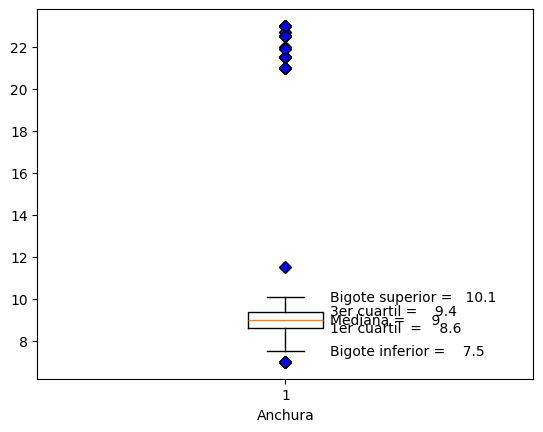

In [36]:
red_diamond = dict(markerfacecolor='b', marker='D')
boxplot = plt.boxplot(np_vol, flierprops=red_diamond)
#Mostramos la mediana
med = boxplot['medians'][0]
xpos = med.get_xdata()
xoff = 0.10 * (xpos[1] - xpos[0])
xlabel = xpos[1] + xoff
median = med.get_ydata()[1]
plt.text(xlabel, median, 'Mediana = {:6.3g}'.format(median), va='center')
#Mostramos el primer y tercer cuartil
cua = boxplot['boxes'][0]
pc25 = cua.get_ydata().min()
pc75 = cua.get_ydata().max()
plt.text(xlabel, pc25, '1er cuartil  = {:6.3g}'.format(pc25), va='center')
plt.text(xlabel, pc75, '3er cuartil = {:6.3g}'.format(pc75), va='center')
#Mostramos los bigotes
bigo = boxplot['caps']
capbottom = bigo[0].get_ydata()[0]
captop = bigo[1].get_ydata()[0]
plt.text(xlabel, capbottom, 'Bigote inferior = {:6.3g}'.format(capbottom), va='center')
plt.text(xlabel, captop, 'Bigote superior = {:6.3g}'.format(captop), va='center')
plt.xlabel('Anchura')
plt.show()

In [37]:
# Las anomalías devueltas por la gráfica BoxPlot
anom_bp = boxplot['fliers'][0]
anom_bp.get_ydata()



array([ 7. ,  7. ,  7. ,  7. ,  7. ,  7. ,  7. , 11.5, 22.7, 22. , 21.5,
       21.5, 21.5, 21.5, 21.9, 21. , 21. , 21. , 21. , 21. , 22.5, 22.5,
       22.5, 23. , 23. , 23. , 23. , 23. ])

In [41]:
print("Se van a mostrar las marcas que son anomálas en la anchura de sus autos")
for cont, anchura in enumerate(np_vol):
    if anchura < capbottom:
        print("El auto {} de marca {} con {} puertas, presenta una ratio anómala.".format(df_vol.iloc[cont, 2],
            df_vol.iloc[cont, 0], df_vol.iloc[cont, 1]))
        print()


Se van a mostrar las marcas que son anomálas en la anchura de sus autos
El auto hatchback de marca audi con dos puertas, presenta una ratio anómala.

El auto hatchback de marca dodge con dos puertas, presenta una ratio anómala.

El auto hatchback de marca mitsubishi con dos puertas, presenta una ratio anómala.

El auto hatchback de marca mitsubishi con dos puertas, presenta una ratio anómala.

El auto hatchback de marca mitsubishi con dos puertas, presenta una ratio anómala.

El auto sedan de marca peugot con cuatro puertas, presenta una ratio anómala.

El auto hatchback de marca plymouth con dos puertas, presenta una ratio anómala.

